## 图像处理工具之 torchvision.transforms

Torchvision 库中的torchvision.transforms包中提供了常用的图像操作，包括对 Tensor 及 PIL Image 对象的操作，例如随机切割、旋转、数据类型转换等等。

按照torchvision.transforms 的功能，大致分为以下几类：数据类型转换、对 PIL.Image 和 Tensor 进行变化和变换的组合。

### 数据类型转换
- transforms.ToTensor()
- transforms.ToPILImage(mode=None)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


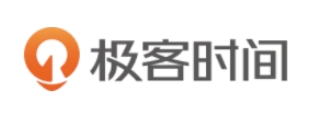

In [1]:
from PIL import Image
from torchvision import transforms

img = Image.open('../01_basic/jk.jpg')
print(type(img))
display(img)

In [2]:
# PIL.Image转为Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))

<class 'torch.Tensor'>


In [3]:
# Tensor转换为PIL.Image
img2 = transforms.ToPILImage()(img1)
print(type(img2))

<class 'PIL.Image.Image'>


### 对 PIL.Image 和 Tensor 进行变换

#### Resize
torchvision.transforms.Resize(size, interpolation=2)

- size：期望输出的尺寸。如果 size 是一个像 (h, w) 这样的元组，则图像输出尺寸将与之匹配。如果 size 是一个 int 类型的整数，图像较小的边将被匹配到该整数，另一条边按比例缩放。
- interpolation：插值算法，int 类型，默认为 2，表示 PIL.Image.BILINEAR。

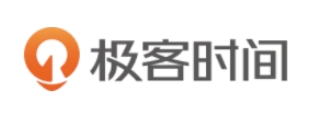

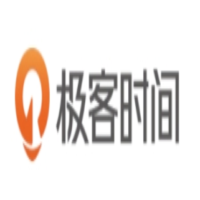

In [5]:
from PIL import Image
from torchvision import transforms

# 定义一个 Resize 操作
resize_img_oper = transforms.Resize((200, 200), interpolation=2)

# 原图
orig_img = Image.open('../01_basic/jk.jpg')
display(orig_img)

# Reszie操作后的图
img = resize_img_oper(orig_img)
display(img)

#### 剪裁
torchvision.transforms提供了多种剪裁方法，例如中心剪裁、随机剪裁、四角和中心剪裁等。

- 中心剪裁: torchvision.transforms.CenterCrop(size)
- 随机剪裁: torchvision.transforms.RandomCrop(size, padding=None)
- FiveCrop: torchvision.transforms.FiveCrop(size)

原图


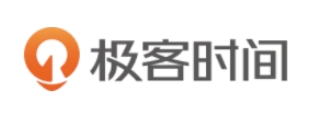

中心裁剪


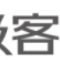

随机裁剪


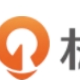

FiveCrop


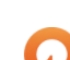

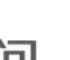

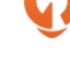

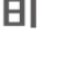

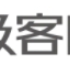

In [9]:
from PIL import Image
from torchvision import transforms

# 定义剪裁操作
center_crop_oper = transforms.CenterCrop((60.70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

# 原图
orig_img = Image.open('../01_basic/jk.jpg')
print('原图')
display(orig_img)

# 中心裁剪
img1 = center_crop_oper(orig_img)
print('中心裁剪')
display(img1)

# 随机裁剪
img2 = random_crop_oper(orig_img)
print('随机裁剪')
display(img2)

# 四角和中心裁剪
imgs = five_crop_oper(orig_img)
print('FiveCrop')
for img in imgs:
    display(img)


#### 翻转
- torchvision.transforms.RandomHorizontalFlip(p=0.5)  以概率 p 随机水平翻转图像
- torchvision.transforms.RandomVerticalFlip(p=0.5) 以概率 p 随机垂直翻转图像

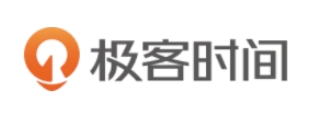

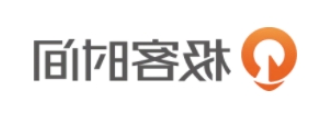

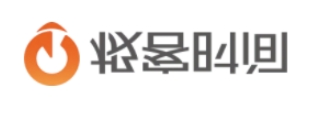

In [10]:
from PIL import Image
from torchvision import transforms

# 定义翻转操作
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

# 原图
orig_img = Image.open('../01_basic/jk.jpg')
display(orig_img)

# 水平翻转
img1 = h_flip_oper(orig_img)
display(img1)

# 垂直翻转
img2 = v_flip_oper(orig_img)
display(img2)

### 只对 Tensor 进行变换
- LinearTransformation（线性变换）
- Normalize（标准化）
- RandomErasing（随机擦除）
- ConvertImageDtype（格式转换）

#### 标准化
标准化是指每一个数据点减去所在通道的平均值，再除以所在通道的标准差，数学的计算公式如下：

*output=(input−mean)/std*

torchvision.transforms.Normalize(mean, std, inplace=False)
- mean：表示各通道的均值；
- std：表示各通道的标准差；
- inplace：表示是否原地操作，默认为否。


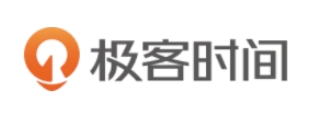

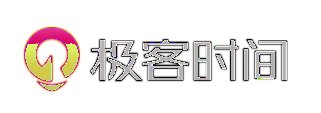

In [11]:
from PIL import Image
from torchvision import transforms

# 定义标准化操作
norm_oper = transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))

# 原图
orig_img = Image.open('../01_basic/jk.jpg')
display(orig_img)

# 图像转化为Tensor
img_tensor = transforms.ToTensor()(orig_img)

# 标准化
tensor_norm = norm_oper(img_tensor)

# Tensor转化为图像
img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

#### 变换的组合
torchvision.transforms.Compose(transforms)

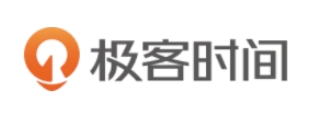

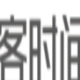

In [16]:
from PIL import Image
from torchvision import transforms

# 原图
orig_img = Image.open('../01_basic/jk.jpg')

# 定义组合操作
composed = transforms.Compose([transforms.Resize((200,200)),
                              transforms.RandomCrop(80)])
img = composed(orig_img)

display(orig_img)
display(img)

### 结合datasets使用

In [17]:
from torchvision import transforms
from torchvision import datasets

# 定义一个transform
my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.5),(0.5))
                                   ])

# 读取 MNIST 数据集 同时做数据变换
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=my_transform,
                               target_transform=None,
                               download=True)

# 查看变换后的数据类型
item = mnist_dataset.__getitem__(0)
print(type(item[0]))

<class 'torch.Tensor'>
